<a href="https://colab.research.google.com/github/MaulidyaAyu/DataMining/blob/main/K-NN%20-%20DataKelulusanMahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('datamahasiswa.csv')

In [3]:
dataset.head()

,NAMA,JENIS KELAMIN,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,0
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,0
2,MURYA ARIEF BASUKI,PEREMPUAN,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,0
3,NANIK SUSANTI,PEREMPUAN,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,0
4,RIFKA ISTIQFARINA,PEREMPUAN,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,0


In [5]:
x = dataset.iloc[:, [2,11]].values
y = dataset.iloc[:, -1].values

In [6]:
print(x)

[[28.    3.07]
 [32.    3.17]
 [29.    3.54]
 [27.    3.41]
 [29.    3.09]
 [27.    3.07]
 [26.    3.06]
 [27.    2.91]
 [25.    3.4 ]
 [28.    2.2 ]
 [27.    3.44]
 [32.    2.4 ]
 [26.    2.45]
 [31.    2.57]
 [26.    3.45]
 [27.    3.04]
 [27.    3.19]
 [29.    2.95]
 [27.    2.11]
 [27.    3.38]
 [28.    3.29]
 [26.    3.19]
 [26.    3.11]
 [29.    3.2 ]
 [25.    3.09]
 [30.    3.08]
 [32.    2.32]
 [27.    3.23]
 [27.    3.52]
 [26.    3.  ]
 [25.    3.25]
 [30.    3.1 ]
 [32.    2.86]
 [27.    3.07]
 [27.    3.06]
 [26.    3.1 ]
 [25.    3.07]
 [50.    3.16]
 [27.    3.07]
 [29.    3.03]
 [30.    2.96]
 [28.    3.09]
 [27.    2.9 ]
 [27.    3.03]
 [29.    2.77]
 [25.    3.17]
 [28.    2.94]
 [28.    3.24]
 [32.    3.2 ]
 [27.    2.66]
 [29.    2.14]
 [27.    2.72]
 [26.    2.91]
 [27.    3.05]
 [25.    2.97]
 [28.    2.31]
 [32.    2.73]
 [26.    2.45]
 [26.    2.85]
 [27.    3.15]
 [27.    3.27]
 [28.    2.92]
 [29.    2.93]
 [25.    2.9 ]
 [32.    3.36]
 [27.    3.  ]
 [27.    3

In [7]:
print(y)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [9]:
print(x_train)

[[23.    2.85]
 [26.    2.73]
 [25.    1.82]
 [26.    2.81]
 [26.    2.92]
 [24.    3.16]
 [31.    3.21]
 [26.    2.48]
 [26.    3.11]
 [25.    3.12]
 [29.    3.8 ]
 [24.    3.49]
 [24.    3.28]
 [23.    2.16]
 [27.    3.6 ]
 [25.    3.35]
 [26.    2.45]
 [32.    2.9 ]
 [23.    2.62]
 [25.    3.17]
 [23.    2.41]
 [24.    2.53]
 [29.    2.95]
 [24.    2.75]
 [24.    3.15]
 [25.    3.37]
 [26.    2.89]
 [25.    3.43]
 [25.    2.89]
 [24.    2.47]
 [25.    3.28]
 [27.    2.98]
 [25.    0.92]
 [24.    3.14]
 [24.    2.47]
 [25.    2.64]
 [23.    3.09]
 [25.    2.14]
 [28.    2.64]
 [24.    3.56]
 [28.    2.72]
 [26.    3.58]
 [23.    3.56]
 [24.    3.38]
 [24.    3.07]
 [23.    3.27]
 [27.    3.12]
 [27.    3.07]
 [23.    3.1 ]
 [27.    3.06]
 [32.    1.9 ]
 [26.    2.83]
 [27.    2.76]
 [26.    3.29]
 [23.    3.03]
 [25.    3.35]
 [24.    3.3 ]
 [24.    3.11]
 [26.    3.22]
 [26.    3.02]
 [28.    2.94]
 [23.    3.28]
 [24.    2.71]
 [23.    2.88]
 [50.    2.32]
 [26.    3.24]
 [24.    2

In [10]:
len(x_train)

284

In [11]:
len(x)

379

In [12]:
len(x_test)

95

In [13]:
len(y)

379

In [14]:
len(y_test)

95

In [15]:
len(y_train)

284

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
print(x_train)

[[-9.41391735e-01 -1.68244927e-01]
 [ 1.34484534e-02 -4.26941641e-01]
 [-3.04831610e-01 -2.38872506e+00]
 [ 1.34484534e-02 -2.54477165e-01]
 [ 1.34484534e-02 -1.73385105e-02]
 [-6.23111673e-01  5.00054918e-01]
 [ 1.60484877e+00  6.07845215e-01]
 [ 1.34484534e-02 -9.65893129e-01]
 [ 1.34484534e-02  3.92264620e-01]
 [-3.04831610e-01  4.13822680e-01]
 [ 9.68288642e-01  1.87977073e+00]
 [-6.23111673e-01  1.21147088e+00]
 [-6.23111673e-01  7.58751632e-01]
 [-9.41391735e-01 -1.65575103e+00]
 [ 3.31728516e-01  1.44860954e+00]
 [-3.04831610e-01  9.09658048e-01]
 [ 1.34484534e-02 -1.03056731e+00]
 [ 1.92312883e+00 -6.04546295e-02]
 [-9.41391735e-01 -6.64080296e-01]
 [-3.04831610e-01  5.21612977e-01]
 [-9.41391735e-01 -1.11679955e+00]
 [-6.23111673e-01 -8.58102831e-01]
 [ 9.68288642e-01  4.73356680e-02]
 [-6.23111673e-01 -3.83825522e-01]
 [-6.23111673e-01  4.78496858e-01]
 [-3.04831610e-01  9.52774167e-01]
 [ 1.34484534e-02 -8.20126890e-02]
 [-3.04831610e-01  1.08212252e+00]
 [-3.04831610e-01 -8

In [18]:
print(x_test)

[[-0.62311167  0.2413582 ]
 [-0.94139174 -1.74198327]
 [-0.62311167  0.69407745]
 [-0.62311167  0.32759044]
 [-0.30483161 -1.52640268]
 [ 0.33172852  1.06056446]
 [-0.62311167  0.43538074]
 [ 0.33172852  0.15512597]
 [-0.94139174 -0.59940612]
 [-0.30483161  0.52161298]
 [-0.30483161  0.19824208]
 [-0.62311167  0.82342581]
 [ 0.01344845  0.86654193]
 [ 0.33172852 -1.3539382 ]
 [-0.94139174 -0.85810283]
 [ 0.33172852  0.47849686]
 [-0.30483161 -0.42694164]
 [ 6.69732978  0.19824208]
 [-0.30483161  0.09045179]
 [-0.62311167  0.93121611]
 [-0.94139174 -0.16824493]
 [-0.62311167  0.73719357]
 [-0.62311167 -0.03889657]
 [-0.94139174 -4.17804399]
 [-0.62311167  1.57795789]
 [ 0.65000858  0.2413582 ]
 [ 1.28656871  0.02577761]
 [ 0.33172852  0.02577761]
 [-0.94139174  0.62940327]
 [ 0.01344845  0.99589029]
 [-0.94139174  0.84498387]
 [ 0.01344845  0.28447432]
 [ 1.92312883  0.52161298]
 [-0.94139174  0.06889373]
 [ 7.65216996  0.50005492]
 [ 0.33172852  1.42705148]
 [-0.30483161 -0.94433507]
 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[24 21]
 [12 38]]


<ipython-input-24-32850ad1b25e>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


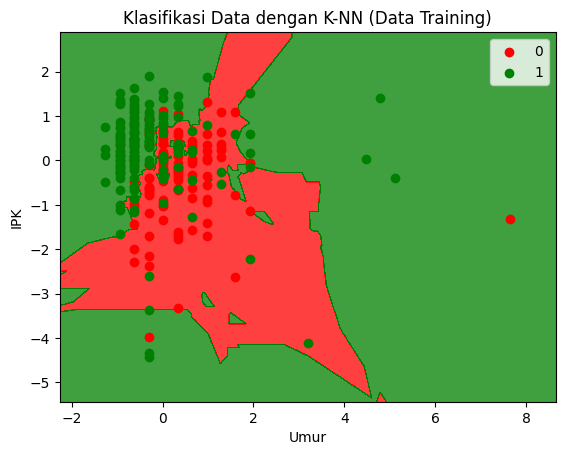

In [24]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Umur')
plt.ylabel('IPK')
plt.legend()
plt.show()

<ipython-input-26-e5a5439a2395>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


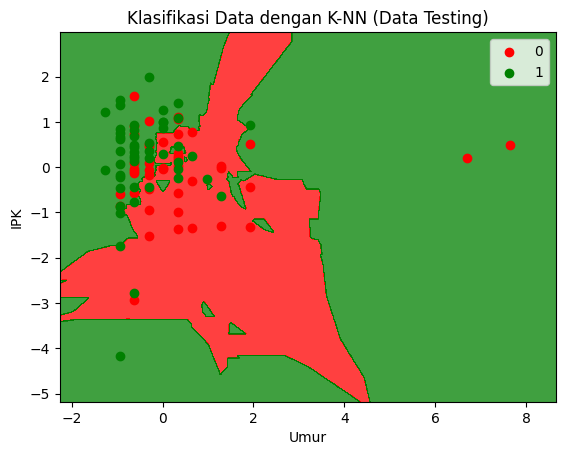

In [26]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:, 1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('Umur')
plt.ylabel('IPK')
plt.legend()
plt.show()